# Reduce dimensionality
- PCA
- t-SNE
- df.drop("column_name", axis =1)
- sns.pairplot()
- VarianceThreshold()
- isna()
- Recursive Feature Elimination
- Regularized linear regression
- Tree-based methods

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
samples =pd.DataFrame({
    'year': [1950, 1970, 1990, 2010, 2050, 2100],
    'pop': [2.519, 3.692, 5.263, 6.9720,  8.94, 10.85],
    'areaa': [1009, 455, 789, 170, 344, 767],
    'continent':['E', "U", 'A', "E", 'A', 'E']
})
samples

,year,pop,areaa,continent
0,1950,2.519,1009,E
1,1970,3.692,455,U
2,1990,5.263,789,A
3,2010,6.972,170,E
4,2050,8.940,344,A
5,2100,10.850,767,E


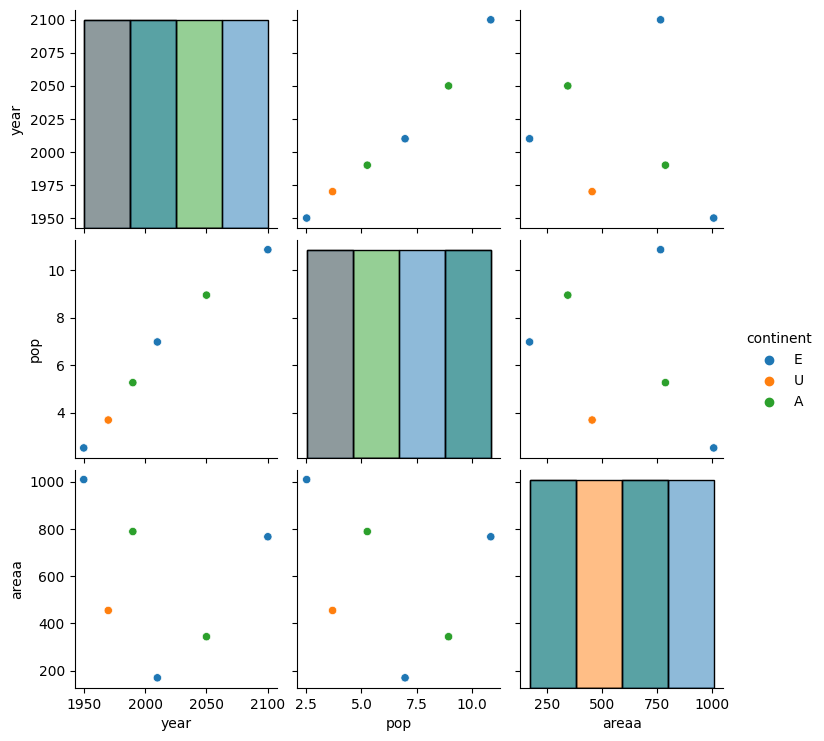

In [139]:
sns.pairplot(samples, hue = 'continent', diag_kind = 'hist')
plt.show()

- ukośna linia między dwoma zmiennym oznacza wysoką korelację, można wtedy usunąć jedną z cech
- pozioma cech oznacza brak wariancji, można taką cechę usunąć
- hue nanosi kolory na wykresy, jeśli okaże się, że jest tylko jeden kolor to można taką cechę usunąć

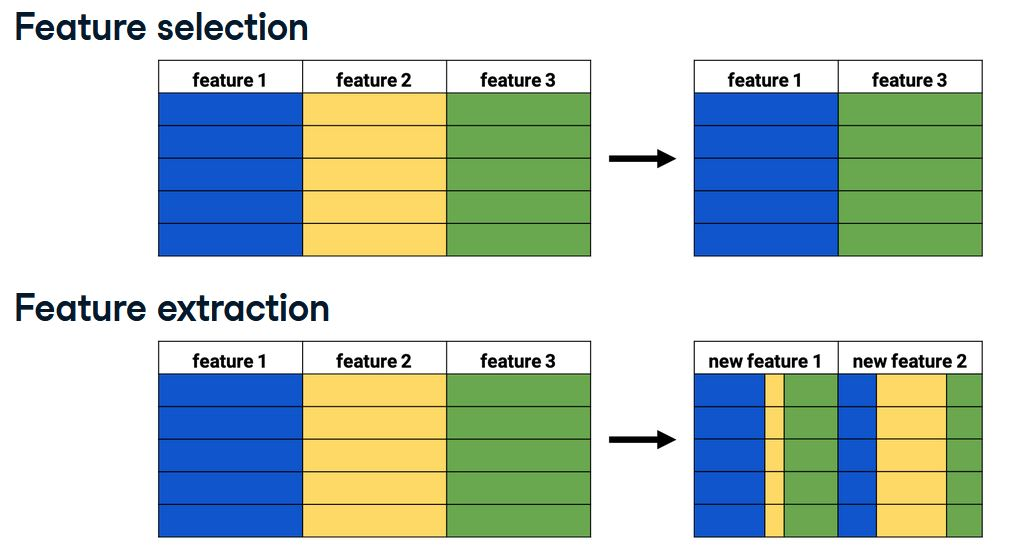

In [140]:
from PIL import Image 
from IPython.display import display
img = Image. open('feature.jpg')
display(img)

- dataset with a lot of strong correlations between the different features, can be reduced a lot with feature extraction -dimention reduce

In [155]:
ansur_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur_f_numeric = ansur_f.drop(non_numeric, axis = 1)

from sklearn.feature_selection import VarianceThreshold

# we choose variance of one
sel = VarianceThreshold(threshold =1)
sel.fit(ansur_f_numeric)

# give us a True or False value on whether each feature's variance is above the threshold or not.
mask = sel.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True]


In [158]:
reduced_ansur = ansur_f_numeric.loc[:,mask]
print(f'ansur_f_numeric: {reduced_ansur.shape}, ansur_f_numeric: {ansur_f_numeric.shape}')

ansur_f_numeric: (1986, 93), ansur_f_numeric: (1986, 94)


In [162]:
# problems of variance, buttocks from ansur df
buttock_df = ansur_f_numeric[['buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength']]

<Axes: >

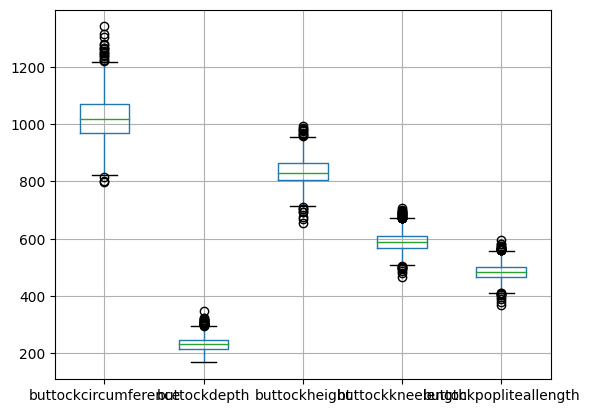

In [165]:
buttock_df.boxplot()

### Normalizing the variance

In [166]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold =0.005)
sel.fit(ansur_f_numeric/ansur_f_numeric.mean())
mask_normalized = sel.get_support()
ansur_f_numeric.loc[:,mask_normalized].shape

(1986, 27)

### IsNA

In [177]:
pokemon = pd.read_csv('data/pokemon.csv', index_col = 0)
pokemon.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [178]:
pokemon.isna().sum()/len(pokemon)

Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

In [179]:
pok_3 =pokemon.isna().sum()/len(pokemon) <0.3
reduced_pokemon = pokemon.loc[:,pok_3]
reduced_pokemon.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,309,39,52,43,60,50,65,1,False


### Pairwise correlation

In [180]:
ansur_f.columns

Index(['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth',
       'chestheight', 'crotchheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'fun

In [189]:
ansur_f[['suprasternaleheight', 'cervicaleheight', 'chestheight']].corr()

,suprasternaleheight,cervicaleheight,chestheight
suprasternaleheight,1.000000,0.980165,0.924047
cervicaleheight,0.980165,1.000000,0.916012
chestheight,0.924047,0.916012,1.000000


<Axes: >

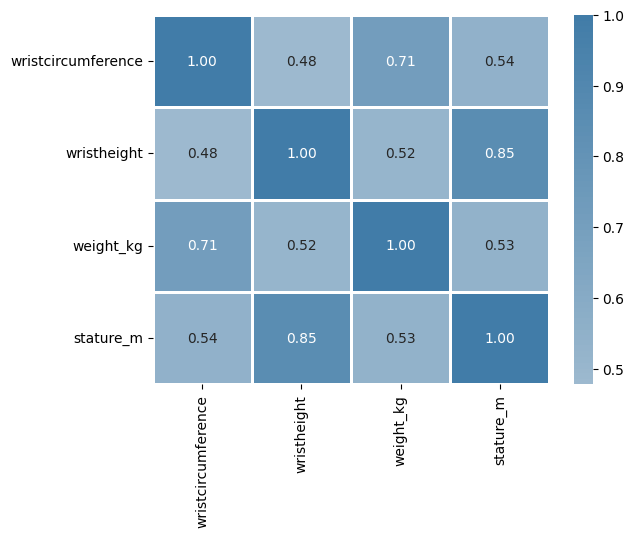

In [193]:
cmap = sns.diverging_palette(h_neg =10, h_pos = 240, as_cmap = True) 

sns.heatmap(ansur_f[['wristcircumference', 'wristheight',
       'weight_kg', 'stature_m']].corr(), center= 0, cmap=cmap, linewidths =1, annot = True, fmt = '.2f' )

<Axes: >

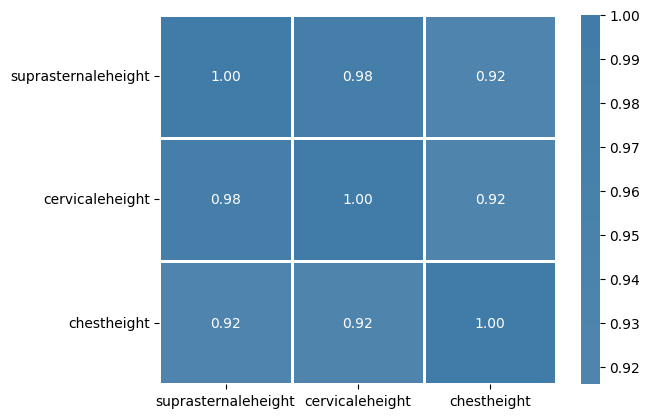

In [190]:
cmap = sns.diverging_palette(h_neg =10, h_pos = 240, as_cmap = True) 

sns.heatmap(ansur_f[['suprasternaleheight', 'cervicaleheight', 'chestheight']].corr(), center= 0, cmap=cmap, linewidths =1, annot = True, fmt = '.2f' )

In [191]:
corr = ansur_f[['suprasternaleheight', 'cervicaleheight', 'chestheight']].corr()

mask = np.triu(np.ones_like(corr, dtype =bool))
mask

array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

<Axes: >

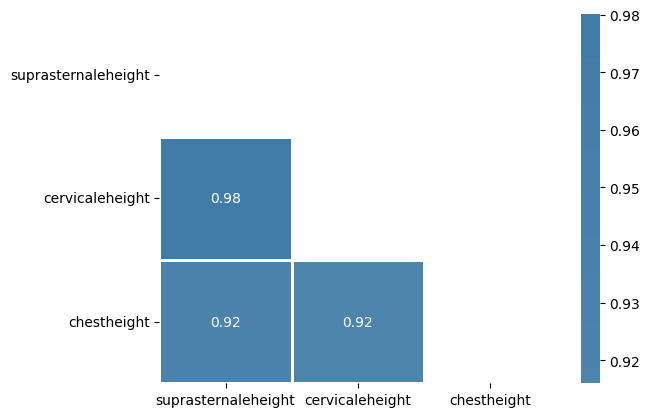

In [192]:
sns.heatmap(ansur_f[['suprasternaleheight', 'cervicaleheight', 'chestheight']].corr(), mask = mask, center= 0, cmap=cmap, linewidths =1, annot = True, fmt = '.2f' )

In [195]:
abs_df = ansur_f[['suprasternaleheight', 'cervicaleheight', 'chestheight']].corr().abs()
abs_df

,suprasternaleheight,cervicaleheight,chestheight
suprasternaleheight,1.000000,0.980165,0.924047
cervicaleheight,0.980165,1.000000,0.916012
chestheight,0.924047,0.916012,1.000000


In [196]:
mask_abs = np.triu(np.ones_like(abs_df, dtype =bool))
tri_df = abs_df.mask(mask_abs)
tri_df

,suprasternaleheight,cervicaleheight,chestheight
suprasternaleheight,NaN,NaN,NaN
cervicaleheight,0.980165,NaN,NaN
chestheight,0.924047,0.916012,NaN


In [199]:
# find columns that meat threshold
to_drop = [c for c in tri_df.columns if any(tri_df[c]>0.95) ]
to_drop

['suprasternaleheight']

In [201]:
reduce_df = ansur_f.drop(to_drop, axis = 1)

# Recursive Feature Elimination - RFE

In [5]:
# Comparing coefficient, to do that we should before Standarized the data
churn_df = pd.read_csv('telecom_churn_clean.csv')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# random_state=30, max_iter=500
log_reg = LogisticRegression(max_iter=10000)

X = churn_df.drop("churn", axis=1)
y = churn_df["churn"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg.fit(X_train_scaled, y_train)
predictions = log_reg.predict(X_test_scaled)
pred_probability = log_reg.predict_proba(X_test)
accu_a = accuracy_score(y_test, predictions)

a = dict(zip(X_train.columns, abs(log_reg.coef_[0])))
a

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


{'Unnamed: 0': 0.13082989834314962,
 'account_length': 0.08889597024130672,
 'area_code': 0.007018204549190366,
 'international_plan': 0.6336138252770344,
 'voice_mail_plan': 0.9773119638793751,
 'number_vmail_messages': 0.5973879242128243,
 'total_day_minutes': 0.3687778322213962,
 'total_day_calls': 0.06488774541219612,
 'total_day_charge': 0.36626689602979634,
 'total_eve_minutes': 0.18125724813009178,
 'total_eve_calls': 0.07211793245289361,
 'total_eve_charge': 0.1708502974857278,
 'total_night_minutes': 0.09064595074498465,
 'total_night_calls': 0.07374364692785626,
 'total_night_charge': 0.09931165914554037,
 'total_intl_minutes': 0.08250114529697382,
 'total_intl_calls': 0.2493865402464046,
 'total_intl_charge': 0.1651578830055772,
 'customer_service_calls': 0.6241389233136007}

In [206]:
accu_a

0.864

In [208]:
# drop column with lowest coeficient score
X.drop('area_code', axis = 1, inplace =True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg.fit(X_train_scaled, y_train)
predictions = log_reg.predict(X_test_scaled)
pred_probability = log_reg.predict_proba(X_test)
accu_b = accuracy_score(y_test, predictions)

b = dict(zip(X_train.columns, abs(log_reg.coef_[0])))
b

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


{'Unnamed: 0': 0.13098552969098892,
 'account_length': 0.08909722056112915,
 'international_plan': 0.6331651736055948,
 'voice_mail_plan': 0.9768877479368618,
 'number_vmail_messages': 0.5970467074331433,
 'total_day_minutes': 0.3688269750008651,
 'total_day_calls': 0.06481758133041746,
 'total_day_charge': 0.36632174215948016,
 'total_eve_minutes': 0.1811680587575658,
 'total_eve_calls': 0.07207997413867617,
 'total_eve_charge': 0.17067260117872068,
 'total_night_minutes': 0.0906117252649347,
 'total_night_calls': 0.07379614075942928,
 'total_night_charge': 0.09934943490581041,
 'total_intl_minutes': 0.08241872333778294,
 'total_intl_calls': 0.24938930192970873,
 'total_intl_charge': 0.16535242743012574,
 'customer_service_calls': 0.623978737594777}

In [209]:
accu_b

0.865

In [6]:
from sklearn.feature_selection import RFE

# used for model that produces feature coefficients or feature importance values
# it first fits the internal model and then drops the feature with the weakest coefficient, 
# keep repeating untill reach 'n_features_to_select'
# verbose = 1 drop the feature one by one
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 2, verbose =1)
rfe.fit(X_train_scaled, y_train)

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)

In [7]:
X.columns[rfe.support_]

Index(['international_plan', 'total_day_minutes'], dtype='object')

In [9]:
dict(zip(X.columns, rfe.ranking_))

{'Unnamed: 0': 11,
 'account_length': 13,
 'area_code': 18,
 'international_plan': 1,
 'voice_mail_plan': 3,
 'number_vmail_messages': 4,
 'total_day_minutes': 1,
 'total_day_calls': 17,
 'total_day_charge': 5,
 'total_eve_minutes': 6,
 'total_eve_calls': 16,
 'total_eve_charge': 10,
 'total_night_minutes': 12,
 'total_night_calls': 15,
 'total_night_charge': 9,
 'total_intl_minutes': 14,
 'total_intl_calls': 8,
 'total_intl_charge': 7,
 'customer_service_calls': 2}

In [10]:
accuracy_score(y_test, rfe.predict(X_test_scaled))

0.854

# Tree-based methods

Tree-based methods – These methods such as Random Forest, Gradient Boosting provides us feature importance as a way to select features as well. Feature importance tells us which features are more important in making an impact on the target feature.

### Random forest classifier
- ensemble model that will pass different, random, subsets of features to a number of decision trees
- To make a prediction it will aggregate over the predictions of the individual trees.

In [58]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
X = churn_df.drop("churn", axis=1)
y = churn_df["churn"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
accuracy_score(y_test, rf.predict(X_test))

0.949

In [60]:
# Feature importance values
rf.feature_importances_

array([0.03238729, 0.03194027, 0.00980444, 0.0815212 , 0.02181196,
       0.02607888, 0.11946239, 0.0330976 , 0.14452776, 0.06648854,
       0.03033663, 0.06109579, 0.03371291, 0.028025  , 0.03786267,
       0.04615419, 0.05030936, 0.04234792, 0.10303519])

In [61]:
dict(zip(X.columns,rf.feature_importances_))

{'Unnamed: 0': 0.032387289034446036,
 'account_length': 0.03194026574774284,
 'area_code': 0.009804436737815798,
 'international_plan': 0.08152119946513073,
 'voice_mail_plan': 0.02181196450025334,
 'number_vmail_messages': 0.026078876998273246,
 'total_day_minutes': 0.11946239158186356,
 'total_day_calls': 0.03309760226253989,
 'total_day_charge': 0.14452776310464804,
 'total_eve_minutes': 0.06648854031554212,
 'total_eve_calls': 0.030336633388326886,
 'total_eve_charge': 0.061095791931054744,
 'total_night_minutes': 0.03371290637503333,
 'total_night_calls': 0.028025001329471666,
 'total_night_charge': 0.037862674910541676,
 'total_intl_minutes': 0.04615419069291264,
 'total_intl_calls': 0.05030936156036435,
 'total_intl_charge': 0.042347917382168504,
 'customer_service_calls': 0.10303519268187077}

In [62]:
sum(rf.feature_importances_)

1.0

In [63]:
mask =rf.feature_importances_> 0.1
X_reduced = X.loc[:,mask]
X_reduced.head(5)

,total_day_minutes,total_day_charge,customer_service_calls
0,265.1,45.07,1
1,161.6,27.47,1
2,243.4,41.38,0
3,299.4,50.90,2
4,166.7,28.34,3


### RFE with random forests

In [64]:
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = 2, verbose =1)
rfe.fit(X_train, y_train)

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

In [65]:
accuracy_score(y_test, rfe.predict(X_test_scaled))

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


0.852

In [23]:
# step = speed up proces, so that on each iteration the 2 least important features are dropped
rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = 2, step = 2, verbose =1)
rfe.fit(X_train, y_train)

Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2,
    verbose=1)

In [24]:
X.columns[rfe.support_]

Index(['total_day_charge', 'total_eve_minutes'], dtype='object')

In [70]:
rf_mask =rfe.support_
rf_mask

array([False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False])

### RFE with gradient boosting

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

rfe_gb = RFE(estimator = GradientBoostingRegressor(), n_features_to_select = 2, verbose =1)
rfe_gb.fit(X_train, y_train)

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=GradientBoostingRegressor(), n_features_to_select=2, verbose=1)

In [68]:
gb_mask =rfe_gb.support_
gb_mask

array([False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False])

In [74]:
# LassoCV
from sklearn.linear_model import LassoCV
# help to find the best alpha

lcv = LassoCV()
lcv.fit(X_train,y_train)

lcv.alpha_

lcv_mask = lcv.coef_ !=0
lcv_mask

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True])

##### Comparing RFE - random forest, RFE GradientBoosting, Lasso Regression

In [77]:
votes = np.sum([gb_mask, rf_mask, lcv_mask], axis = 0)
votes

array([1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [78]:
votes_name = dict(zip(X_train.columns, votes))
votes_name

{'Unnamed: 0': 1,
 'account_length': 1,
 'area_code': 1,
 'international_plan': 1,
 'voice_mail_plan': 0,
 'number_vmail_messages': 1,
 'total_day_minutes': 1,
 'total_day_calls': 1,
 'total_day_charge': 2,
 'total_eve_minutes': 2,
 'total_eve_calls': 1,
 'total_eve_charge': 1,
 'total_night_minutes': 1,
 'total_night_calls': 1,
 'total_night_charge': 0,
 'total_intl_minutes': 1,
 'total_intl_calls': 1,
 'total_intl_charge': 0,
 'customer_service_calls': 1}

In [79]:
# Features choosen by 2 models
meta_mask = votes == 2

# Apply the dimensionality reduction on X
X_reduced = X.loc[:,meta_mask]
print(X_reduced.columns)

Index(['total_day_charge', 'total_eve_minutes'], dtype='object')


In [81]:
# Plug the reduced dataset into a linear regression pipeline
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set using {len(lm.coef_)} features.')

The model can explain 4.9% of the variance in the test set using 2 features.


# t-SNE
- It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized
- it will maximize the distance in two-dimensional space between observations that are most different in a high-dimensional space.

In [26]:
samples =pd.DataFrame({
    'year': [1950, 1970, 1990, 2010, 2050, 2100],
    'pop': [2.519, 3.692, 5.263, 6.9720,  8.94, 10.85],
    'areaa': [1009, 455, 789, 170, 344, 767]
})
samples

,year,pop,areaa
0,1950,2.519,1009
1,1970,3.692,455
2,1990,5.263,789
3,2010,6.972,170
4,2050,8.940,344
5,2100,10.850,767


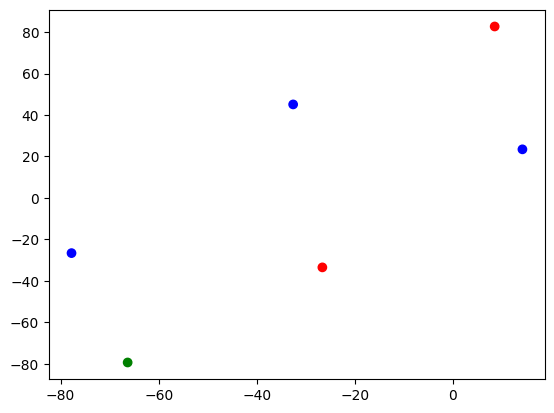

In [27]:
species = ['red', 'red','blue', 'green', 'blue', 'blue']
from sklearn.manifold import TSNE
model_t = TSNE(perplexity=4,learning_rate = 100)
transformed = model_t.fit_transform(samples.values)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c= species )
plt.show()

In [28]:
ANSUR = pd.read_csv('data\ANSUR_II_FEMALE.csv')
ANSUR.shape

(1986, 99)

In [29]:
# t_SNE does not work with not numeric data
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ANSUR_numeric = ANSUR.drop(non_numeric, axis = 1)

In [30]:
from sklearn.manifold import TSNE
model_ta = TSNE(learning_rate = 50)
tsne_features = model_ta.fit_transform(ANSUR_numeric)
tsne_features[1:4,:]

array([[ -9.005669, -37.60087 ],
       [-23.42587 , -23.715586],
       [-21.571384,   7.478587]], dtype=float32)

In [32]:
ANSUR['x'] = tsne_features[:,0]
ANSUR['y'] = tsne_features[:,1]

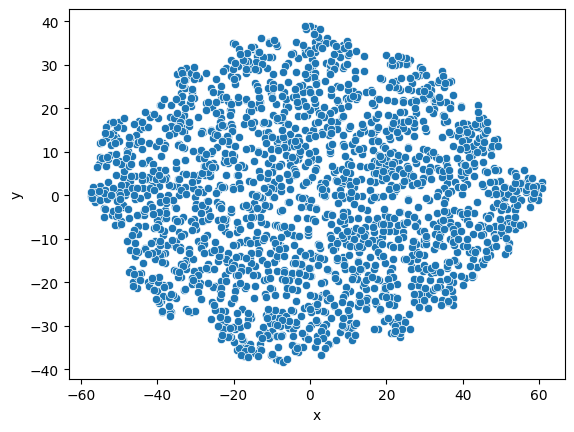

In [33]:
sns.scatterplot(x ='x', y='y', data =ANSUR)
plt.show()

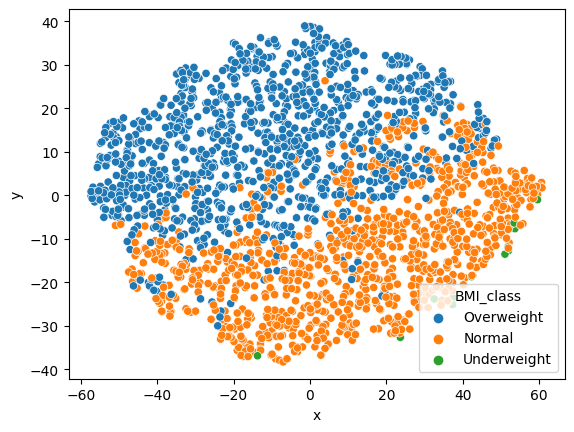

In [34]:
sns.scatterplot(x ='x', y='y', hue = 'BMI_class', data =ANSUR)
plt.show()

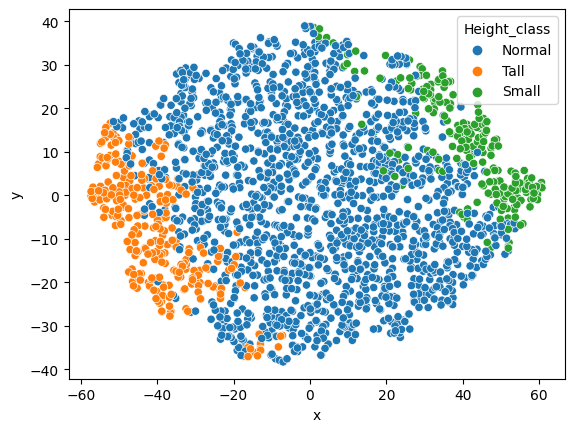

In [35]:
sns.scatterplot(x ='x', y='y', hue = 'Height_class', data =ANSUR)
plt.show()

# Regularized linear regression

In [37]:
from scipy.stats import norm
norm_df =pd.DataFrame({
    'a': norm.rvs(0, size =10),
    'b': norm.rvs(0, size =10),
    'c': norm.rvs(0, size =10)
})
norm_df

,a,b,c
0,-0.149640,0.708852,-0.747097
1,2.035336,-0.851605,0.491109
2,1.514873,0.175704,-0.065267
3,-0.291637,-0.364364,0.842324
4,0.945397,-1.123363,0.191502
5,-0.343743,-2.027881,-0.062454
6,-0.587791,0.713184,0.912577
7,0.990677,0.453512,-0.357131
8,1.457860,-0.769254,-0.898724
9,0.137936,0.249576,-0.258660


In [38]:
# y = 20 +5*a + 2*b + 0*c
norm_df['d'] =20 +5*norm_df['a'] + 2*norm_df['b'] + 0*norm_df['c']
norm_df

,a,b,c,d
0,-0.149640,0.708852,-0.747097,20.669502
1,2.035336,-0.851605,0.491109,28.473472
2,1.514873,0.175704,-0.065267,27.925772
3,-0.291637,-0.364364,0.842324,17.813087
4,0.945397,-1.123363,0.191502,22.480258
5,-0.343743,-2.027881,-0.062454,14.225522
6,-0.587791,0.713184,0.912577,18.487414
7,0.990677,0.453512,-0.357131,25.860409
8,1.457860,-0.769254,-0.898724,25.750794
9,0.137936,0.249576,-0.258660,21.188829


In [40]:
X = norm_df.drop("d", axis=1)
y = norm_df["d"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [41]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_train,y_train)
# Actual coefficient = [5,2,0]
reg.coef_

array([ 5.00000000e+00,  2.00000000e+00, -6.66133815e-16])

In [50]:
zero_coef = reg.coef_ == 0
n_ignored = sum(zero_coef)
n_ignored

0

In [42]:
# Actual intercept = 20
reg.intercept_

20.0

In [43]:
# Calculate R-squared value:
# This tells us how much of the variance in the target feature our model can predict.
reg.score(X_test,y_test)

1.0

### Lasso regressor
- keep coefficients lower
- alfa (you can choose) * |coefficient| + loss function
- it tends to shrink the coefficients of less important features to zero

In [45]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X_train,y_train)
# Actual coefficient = [5,2,0]
reg.coef_

array([ 5.00000000e+00,  2.00000000e+00, -6.66133815e-16])

In [46]:
# Actual intercept = 20
reg.intercept_

20.0

array([ 5.00000000e+00,  2.00000000e+00, -6.66133815e-16])

### LassoCV regressor

In [51]:
from sklearn.linear_model import LassoCV
# help to find the best alpha

lcv = LassoCV()
lcv.fit(X_train,y_train)

lcv.alpha_

0.002028794918623416

In [53]:
mask = lcv.coef_ !=0
reduced_X= X.loc[:,mask]
reduced_X.columns

Index(['a', 'b'], dtype='object')

# PCA
- PCA removes correlation

### Combainig few fetures into one - manual

In [84]:
grocery_sales = pd.read_csv('data/grocery_sales.csv')
non_numeric = ['storeID', 'product']
grocery_num = grocery_sales.drop(non_numeric, axis = 1)
grocery_num.head()

,quantity,revenue
0,1811,9300.6
1,1003,3375.2
2,1604,8528.5
3,1785,9181.0
4,944,3680.2


In [85]:
grocery_num['price'] = grocery_num['revenue']/grocery_num['quantity']

# Drop the quantity and revenue features
reduced_df = grocery_num.drop(['quantity','revenue'], axis=1)

print(reduced_df.head())

      price
0  5.135616
1  3.365105
2  5.317020
3  5.143417
4  3.898517


In [88]:
reduced_df['mean'] = grocery_num[['revenue', 'quantity']].mean(axis=1)
print(reduced_df.head())

      price     mean
0  5.135616  5555.80
1  3.365105  2189.10
2  5.317020  5066.25
3  5.143417  5483.00
4  3.898517  2312.10


### PCA baginning

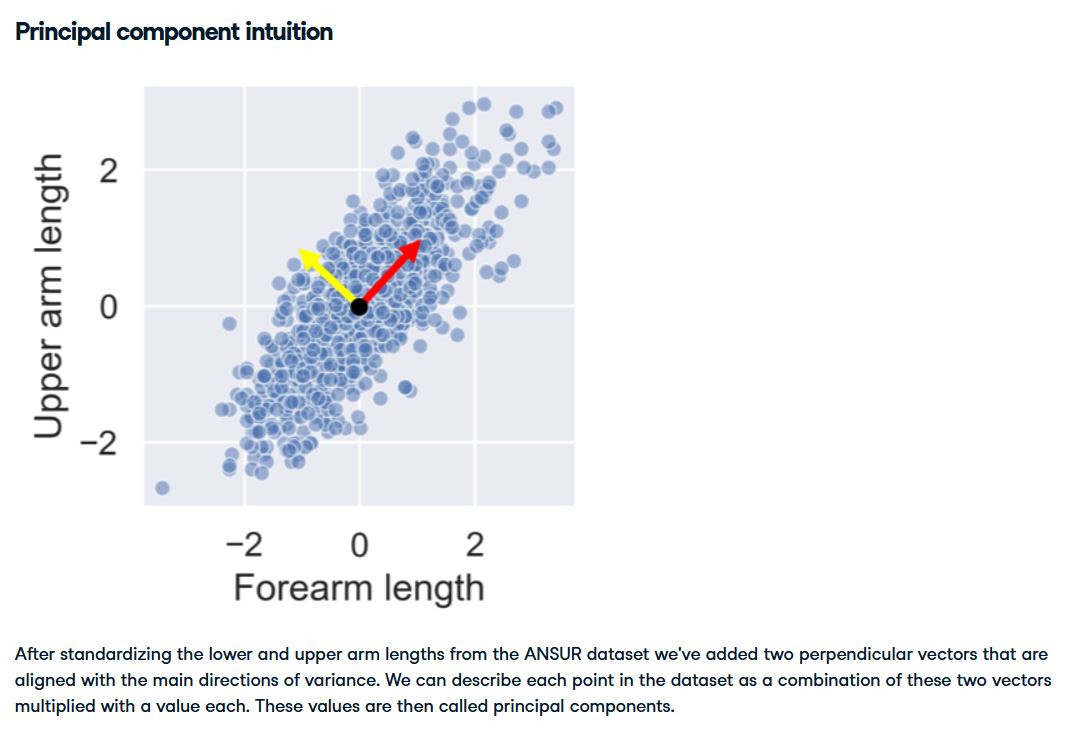

In [90]:
from PIL import Image 
from IPython.display import display
img = Image. open('vektor.jpg')
display(img)

# People with a negative component for the yellow vector have long forearms relative to their upper arms.
# People with a positive component for the yellow vector have short forearms relative to their upper arms.
# People with a negative component for the red vector have below average arm lengths.
# People with a positive component for the red vector have above average arm lengths.

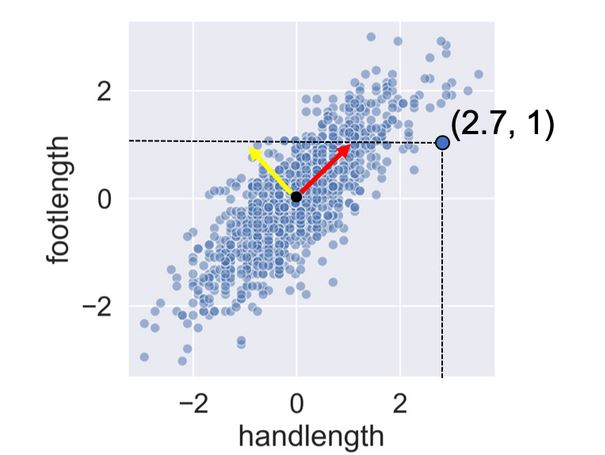

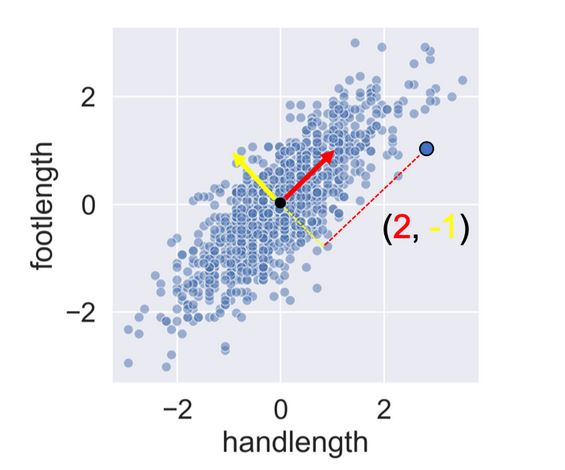

In [93]:
from PIL import Image 
from IPython.display import display
img = Image. open('pointpca.jpg')
display(img)

from PIL import Image 
from IPython.display import display
img = Image. open('pointpca2.jpg')
display(img)

In [149]:
ansur_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur_f_numeric = ansur_f.drop(non_numeric, axis = 1)
X = ansur_f_numeric.drop("stature_m", axis=1)
y = ansur_f_numeric["stature_m"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [146]:
pd.set_option("display.max_rows", None)

In [147]:
ansur_f.nunique()

Branch                               3
Component                            3
Gender                               1
abdominalextensiondepthsitting     167
acromialheight                     292
acromionradialelength              103
anklecircumference                  92
axillaheight                       278
balloffootcircumference             72
balloffootlength                    59
biacromialbreadth                  108
bicepscircumferenceflexed          166
bicristalbreadth                   130
bideltoidbreadth                   161
bimalleolarbreadth                  27
bitragionchinarc                    82
bitragionsubmandibulararc           90
bizygomaticbreadth                  36
buttockcircumference               355
buttockdepth                       139
buttockheight                      234
buttockkneelength                  182
buttockpopliteallength             163
calfcircumference                  161
cervicaleheight                    303
chestbreadth             

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_df = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA()
pc = pca.fit_transform(std_df)

In [101]:
pca.explained_variance_ratio_
# In this case it tells us that the first components explains 43% of the variance in the data
# the second the remaining 15%

array([4.37721233e-01, 1.52027367e-01, 5.03262555e-02, 3.82775099e-02,
       2.82623668e-02, 2.27421758e-02, 1.96682949e-02, 1.57502622e-02,
       1.47227165e-02, 1.35468805e-02, 1.21209326e-02, 1.08635619e-02,
       1.05170572e-02, 9.21370626e-03, 8.82771677e-03, 8.34821545e-03,
       8.32338271e-03, 7.58423749e-03, 7.25077130e-03, 6.74567861e-03,
       6.46450628e-03, 6.09548541e-03, 5.73766338e-03, 5.55463694e-03,
       4.92739041e-03, 4.69873327e-03, 4.37298974e-03, 3.99101084e-03,
       3.79049473e-03, 3.71282774e-03, 3.48208296e-03, 3.34744943e-03,
       3.11656832e-03, 2.97433185e-03, 2.93051436e-03, 2.84191112e-03,
       2.63895213e-03, 2.37476086e-03, 2.22374780e-03, 2.10294133e-03,
       2.00818687e-03, 1.92334451e-03, 1.84138918e-03, 1.76341166e-03,
       1.69798586e-03, 1.65366024e-03, 1.57152903e-03, 1.46125541e-03,
       1.39126225e-03, 1.36360227e-03, 1.30090719e-03, 1.27812335e-03,
       1.18042165e-03, 1.16007119e-03, 1.10590222e-03, 1.04226404e-03,
      

In [104]:
np.round(pca.explained_variance_ratio_.cumsum(),2)

array([0.44, 0.59, 0.64, 0.68, 0.71, 0.73, 0.75, 0.76, 0.78, 0.79, 0.81,
       0.82, 0.83, 0.84, 0.84, 0.85, 0.86, 0.87, 0.88, 0.88, 0.89, 0.9 ,
       0.9 , 0.91, 0.91, 0.92, 0.92, 0.92, 0.93, 0.93, 0.94, 0.94, 0.94,
       0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 0.96, 0.96, 0.97, 0.97,
       0.97, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99,
       0.99, 0.99, 0.99, 0.99, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  ])

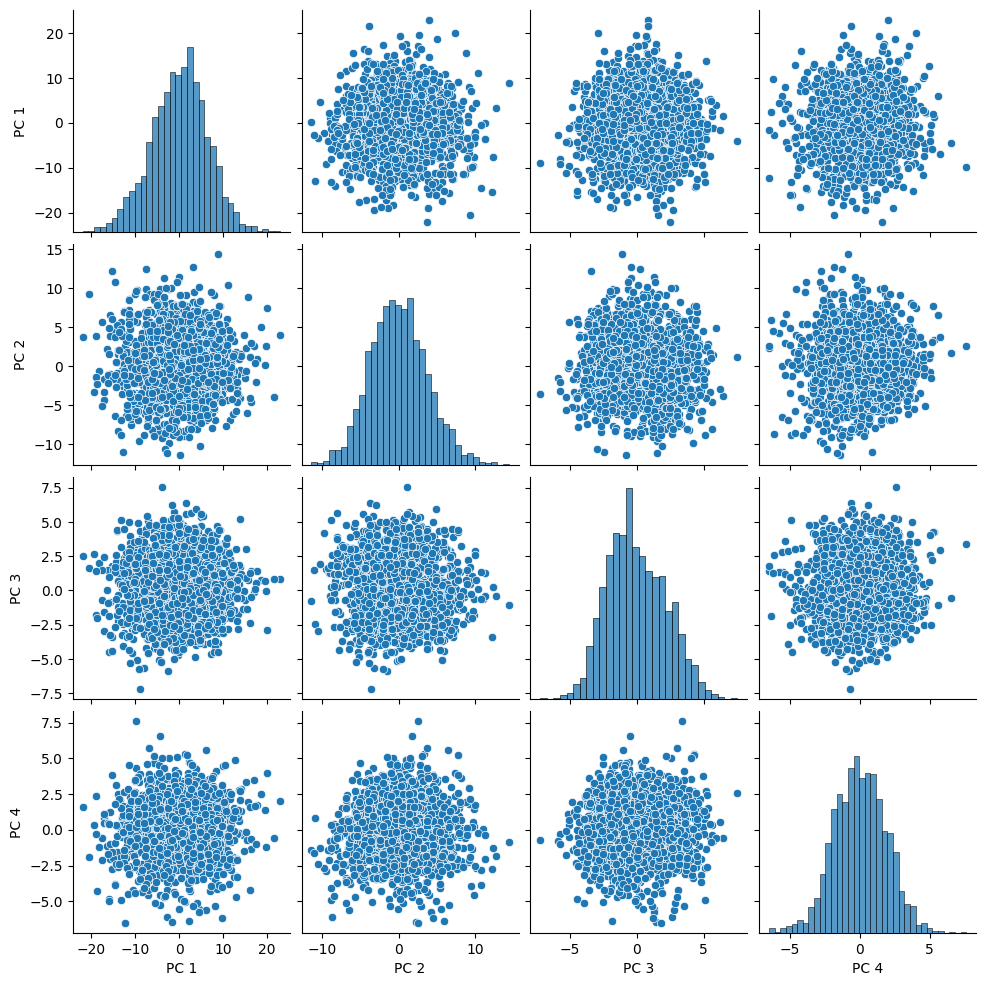

In [106]:
pc_df = pd.DataFrame(pc[:,:4], columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

In [108]:
# tells us to what extent each component's vector is affected by a particular feature.
pca.components_

array([[-8.64132623e-02, -1.33299597e-01, -1.21901558e-01, ...,
        -1.09969014e-01, -1.34145049e-01, -8.24182997e-02],
       [ 1.72081223e-01, -1.00815099e-01, -9.32024409e-02, ...,
        -5.56560677e-02,  1.29749022e-01,  2.15711741e-01],
       [ 4.08338829e-02, -1.39701448e-01, -9.54349126e-03, ...,
        -2.42594546e-01, -1.26327956e-02,  6.58901287e-02],
       ...,
       [ 2.09390126e-02, -3.40356912e-01, -6.86685618e-03, ...,
         1.16772302e-01, -5.02322478e-02,  3.96453141e-02],
       [ 1.77900492e-03, -7.82350351e-01,  1.63845777e-02, ...,
         1.53538748e-01,  3.78010393e-02, -1.29875887e-02],
       [-1.30610029e-04, -6.49004556e-02,  1.63642447e-02, ...,
         6.30888004e-03,  7.16567524e-01, -6.44911260e-01]])

In [111]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce', PCA())])

pipe_pc = pipe.fit_transform(X)

In [114]:
ansur_categories = ansur_f

<Axes: xlabel='PC 1', ylabel='PC 2'>

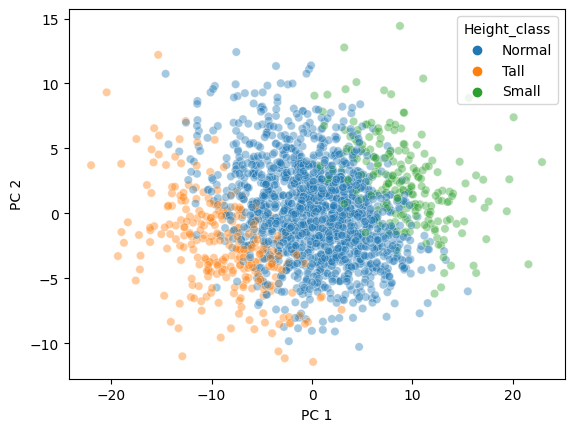

In [115]:
ansur_categories['PC 1'] = pipe_pc[:,0]
ansur_categories['PC 2'] = pipe_pc[:,1]

sns.scatterplot(data = ansur_categories, x ='PC 1', y = 'PC 2', hue = 'Height_class', alpha= 0.4)

<Axes: xlabel='PC 1', ylabel='PC 2'>

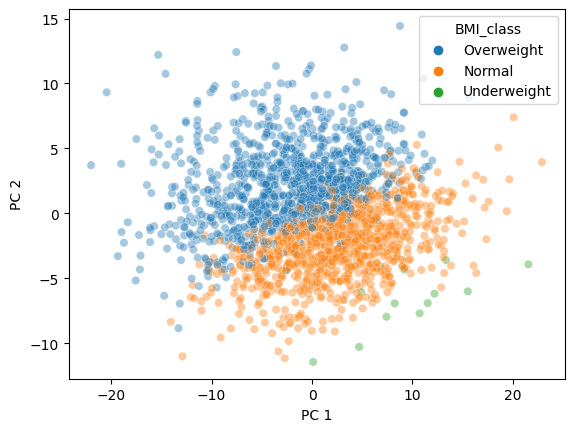

In [117]:
sns.scatterplot(data = ansur_categories, x ='PC 1', y = 'PC 2', hue = 'BMI_class', alpha= 0.4)

In [126]:
from sklearn.pipeline import Pipeline
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components = 3)),
    ('classifier', RandomForestClassifier())])

pipe2['reducer']

PCA(n_components=3)

In [155]:
ansur_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur_f_numeric = ansur_f.drop(non_numeric, axis = 1)
X_c = ansur_f_numeric.drop("earbreadth", axis=1)
y_c = ansur_f_numeric["earbreadth"]

X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(X_c,y_c,test_size=0.3,random_state=21)

pipe2.fit(X_train_c,y_train_c)
pipe2['reducer'].explained_variance_ratio_.round(2)

array([0.45, 0.15, 0.05])

In [153]:
pipe2['reducer'].explained_variance_ratio_.sum()

0.6509225121795447

In [154]:
pipe2.score(X_test_c, y_test_c)

0.1325503355704698

In [156]:
# An alternative technique is telling PCA the minimal proportion of variance we want to keep 
# and let the algorithm decide on the number of components it needs to achieve that. 
# passing a number between 0 and 1 to the n_components
# 0.9 it will make sure to select enough components to explain 90% of the variance
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components = 0.9))])

In [157]:
pipe3.fit(ansur_f_numeric)
len(pipe3['reducer'].components_)

23

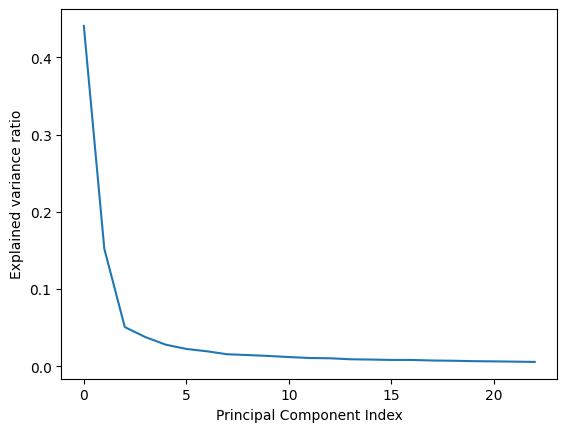

In [158]:
# 'Elbow' in the plot
var = pipe3['reducer'].explained_variance_ratio_

plt.plot(var)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained variance ratio')
plt.show()

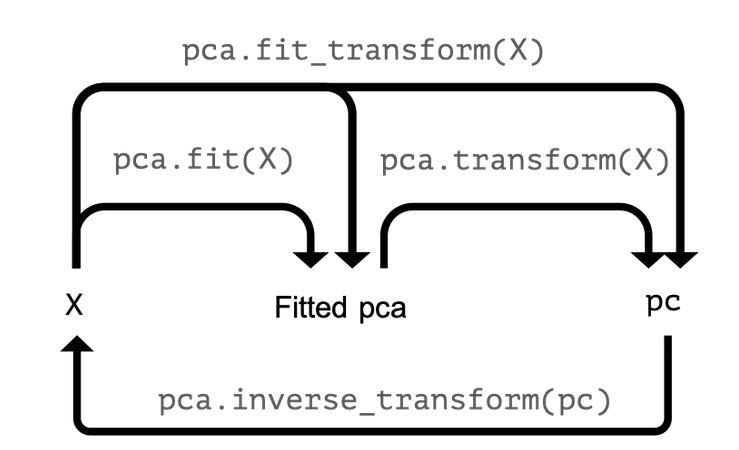

In [159]:
from PIL import Image 
from IPython.display import display
img = Image. open('operation.jpg')
display(img)

In [ ]:
# Inverse quite always used to rebuild pictures